In [1]:
from sqlalchemy import create_engine
import pandas as pd
engine = create_engine('postgresql://postgres:4@localhost:5432/Homework')
connection = engine.connect()

In [8]:
import matplotlib.pyplot as plt

In [2]:
salary_df = pd.read_sql_query("SELECT * FROM salaries", connection)

In [3]:
salary_df['salary'].max()

129492

In [4]:
salary_df['salary'].min()

40000

In [5]:
# Create bins
bins = [40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000]

# Create labels for these bins
group_labels = ["40K~", "50K~", "60K~", "70K~", "80K~", "90K~","100K~", "110K~", "120K~"]

In [6]:
# Place the data series into a new column inside of the DataFrame
salary_df["Salary Range"] = pd.cut(salary_df["salary"], bins, labels=group_labels)
salary_df.head()

,emp_no,salary,Salary Range
0,10001,60117,60K~
1,10002,65828,60K~
2,10003,40006,40K~
3,10004,40054,40K~
4,10005,78228,70K~


In [7]:
# Create a GroupBy object
salary_group = salary_df.groupby("Salary Range")
print(salary_group["emp_no"].count())

Salary Range
40K~     63126
50K~     57917
60K~     41405
70K~     24814
80K~     11844
90K~      4285
100K~     1068
110K~      195
120K~       24
Name: emp_no, dtype: int64


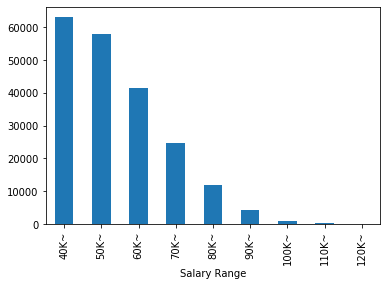

In [10]:
# Create a histogram to visualize the most common salary ranges for employees.
salary_group["emp_no"].count().plot.bar()

In [ ]:
# Create a bar chart of average salary by title.
